**Import the Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [4]:
data=pd.read_csv("netflix.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Check the Shape of the Dataset**

In [5]:
data.shape

(8807, 12)

**insight - There are 8807 rows and 12 columns**

**check all the columns along with datatypes and non-null values**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Check for count of n*ll values in every column**

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Here are the number of null values in the respective Column**

**Filling the null values by "Unknown Column Name**

In [8]:
#data.fillna({'director':'Unknown Director','cast':'Unknown Cast','country':'Unknown Country','date_added':'Unknown Date_Added','rating':'Unknown Rating','duration':'Unknown Duration'})

data['director'].fillna('Unknown Director',inplace=True)
data['cast'].fillna('Unknown Cast',inplace=True)
data['country'].fillna('United States',inplace=True)
...
data['date_added']=data['date_added'].dropna()
data['rating']=data['rating'].fillna('Unknown Rating')
data['duration']=data['duration'].fillna('Unknown Duration')
...

C:\Users\User\AppData\Local\Temp\ipykernel_3868\2197702358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown Director',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3868\2197702358.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Ellipsis

In [9]:
data.dropna(subset=['date_added'],inplace=True)
data.dropna(subset=['rating'],inplace=True)
data.dropna(subset=['duration'],inplace=True)

In [21]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


**To ensure, there is no null values**

In [10]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Count of total Movies & TV Shows are there in dataset and shows it through a countplot**

**Question - Comparison of tv shows vs. movies**

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3868\4261245239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=data,palette=['Blue','Red'])


Text(0.5, 1.0, 'Different Shows on Netflix')

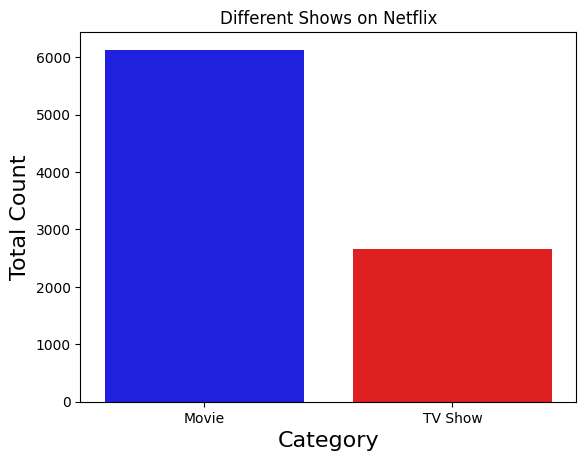

In [11]:
print(data['type'].value_counts())
sns.countplot(x='type',data=data,palette=['Blue','Red'])
plt.xlabel("Category",fontsize=16)
plt.ylabel('Total Count',fontsize=16)
plt.title("Different Shows on Netflix")

**Insight - There are total 6131 Movie & 2666 TV Show released**    


*Proportion of the Movies & TV Shows*

([<matplotlib.patches.Wedge at 0x1f405859160>,
 [Text(-0.8960887472673337, -0.637985075860604, 'Movie'),
  Text(1.0590139081279744, 0.7539824549626566, 'TV Show')],
 [Text(-0.4887756803276365, -0.3479918595603294, '69.69%'),
  Text(0.6517008665402918, 0.4639892030539425, '30.31%')])

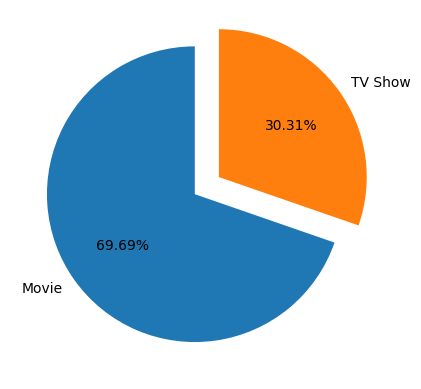

In [16]:
plt.pie(data['type'].value_counts(),labels=['Movie','TV Show'],startangle=90,explode=(0,0.2),autopct='%.2f%%')

**Insight - Proportion of the Movies and TV Shows are 69.69% and 30.31% respectively**    


**Does Netflix has more focus on TV Shows than movies in recent years**


Text(0.5, 1.0, 'Comparision between Movies & TV Shows')

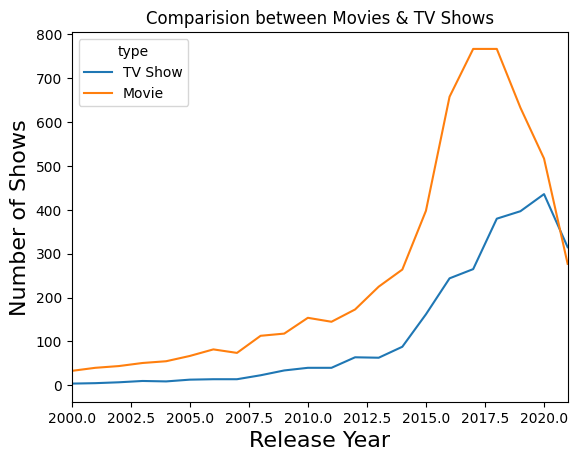

In [151]:
data1=data[['release_year','type']]
data2=data1.groupby(['release_year','type']).size().reset_index(name='Counts')
sns.lineplot(data=data2, x='release_year',y='Counts',hue='type')
plt.xlim(left=2000,right=2021)
plt.xlabel("Release Year",fontsize=16)
plt.ylabel("Number of Shows",fontsize=16)
plt.title("Comparision between Movies & TV Shows")

**Insight - It shows Netflix is more focused on Movies in recent few years**


**Recommandation - Movies are good but we need to more focus on TV_Shows**

**Count of Shows Year wise**

Text(0.5, 1.0, 'Comparision by Release Year')

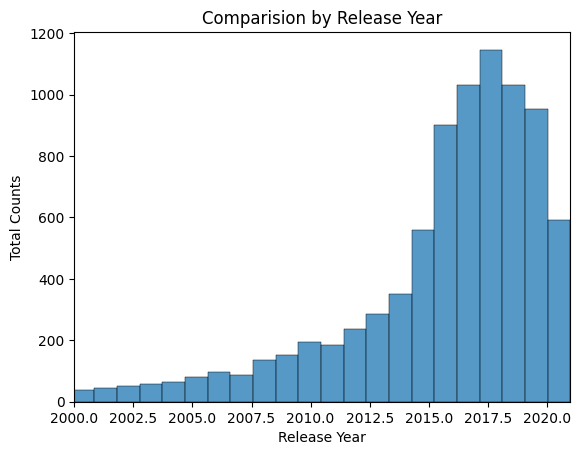

In [26]:
sns.histplot(data['release_year'],bins=100)
plt.xlim(left=2000,right=2021)
plt.xlabel("Release Year")
plt.ylabel("Total Counts")
plt.title("Comparision by Release Year")

**Insight - Most of the Movies and TV Shows are released between 2015 & 2020**

**Recommandation - in 2021 number of shows got decreased so we need to find the reasons for that**

**Top 5 Ratings**

  rating  count
0  TV-MA   3207
1  TV-14   2160
2  TV-PG    863
3      R    799
4  PG-13    490
5  TV-Y7    334
6   TV-Y    307
7     PG    287
8   TV-G    220
9     NR     80


Text(0.5, 1.0, 'Rating Chart')

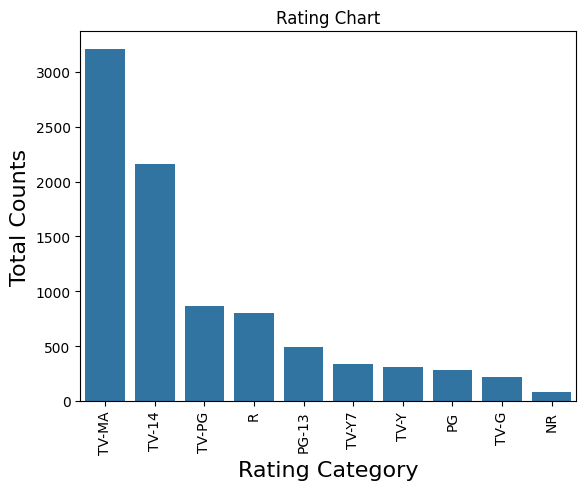

In [123]:
rating_data=data['rating'].value_counts().head(10).reset_index()
rating_data.columns = ['rating', 'count']  # Renaming the columns
print(rating_data)
sns.barplot(data=rating_data,x='rating',y='count')
plt.xticks(rotation=90)
plt.xlabel("Rating Category",fontsize=16)
plt.ylabel("Total Counts",fontsize=16)
plt.title("Rating Chart",)


**Insight - Here are top 10 ratings like TV-MA, TV-14 & TV-PG which are most considered**

**Recommandation - we need to release more Movies and TV Shows with TV-MA, TV-14 & TV-PG ratings**

**Top 10 Rating Chart**

([<matplotlib.patches.Wedge at 0x1dadb1e93d0>,
 [Text(0.45477897252214095, 1.0015867841339092, 'TV-MA'),
  Text(-1.0962914515210072, 0.0902499491521378, 'TV-14'),
  Text(-0.5983501287344652, -0.9230260686694873, 'TV-PG'),
  Text(0.01944456269099595, -1.0998281270188337, 'R'),
  Text(0.506011381731117, -0.976704910174289, 'PG-13'),
  Text(0.7672614926447683, -0.7882320736334715, 'TV-Y7'),
  Text(0.9256878003665182, -0.5942239445298356, 'TV-Y'),
  Text(1.0299095960647602, -0.386375754847173, 'PG'),
  Text(1.0826497865982891, -0.19460071834060458, 'TV-G'),
  Text(1.0972233713684383, -0.07810808743579929, 'NR'),
  Text(1.0995622631576372, -0.031029493061523215, 'G'),
  Text(1.0999281749452308, -0.01257020133703845, 'TV-Y7-FV'),
  Text(1.099966054291808, -0.00864172469541963, 'Unknown Rating'),
  Text(1.0999842187165243, -0.0058922469905561105, 'NC-17'),
  Text(1.0999943196507902, -0.0035350722758060557, 'UR'),
  Text(1.0999982464370883, -0.0019641372993925176, '66 min'),
  Text(1.099999368

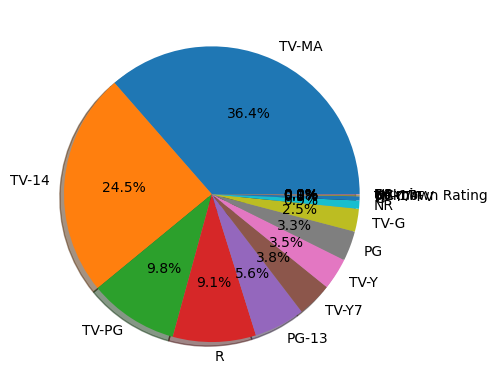

In [29]:
plt.pie(data['rating'].value_counts(),labels=data['rating'].value_counts().index,autopct='%1.1f%%',shadow=True)


**Insight - Here are proportion of ratings between all like TV-MA - 36.4%, TV-14 - 24.5% etc..**

**Rating chart as per TV Shows and Movies**

Text(0.5, 1.0, 'Rating Chart')

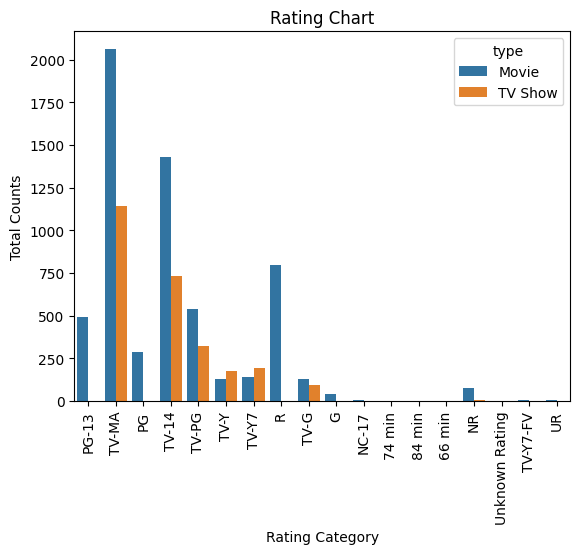

In [30]:
sns.countplot(data=data,x='rating',hue='type')
plt.xticks(rotation=90)
plt.xlabel("Rating Category")
plt.ylabel("Total Counts")
plt.title("Rating Chart")

**Serarate the Movie and TV shows data for further analysis**

In [32]:
#movie_data=data.groupby('type').get_group('Movie')
movie_data=data[data['type']=='Movie']
#tv_data=data.groupby('type').get_group('TV Show')
tv_data=data[data['type']=='TV Show']


**Question: How has the number of movies released per year changed over the last 20-30 years?**

Text(0.5, 1.0, 'Movies Data')

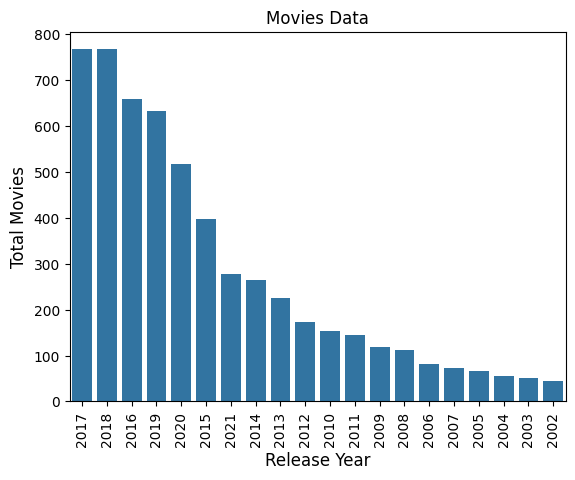

In [33]:
#top 20 years where most movies have been released
top_movies=movie_data['release_year'].value_counts().head(20)
sns.barplot(x=top_movies.index,y=top_movies,order=top_movies.index)
plt.xticks(rotation=90)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Total Movies",fontsize=12)
plt.title("Movies Data")

**Insight - Most Movies are released in the year 2017 & 2018 but the numbers are rapidly decreasing since 2017**

**Recommandation - we need to find out the reasons why good number of movies are not released after 2018**

Text(0.5, 1.0, 'Yearly TV Shows Comparision ')

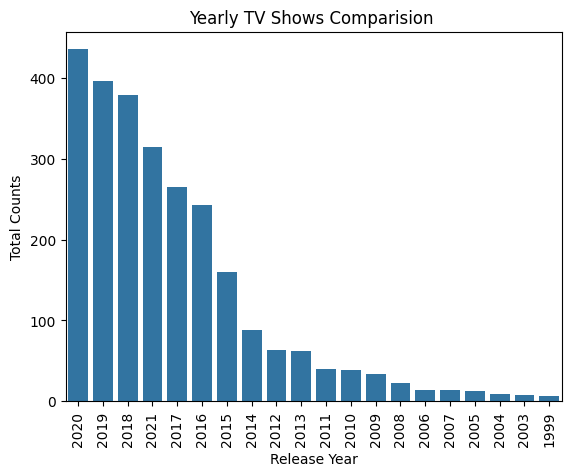

In [34]:
#top 20 years where most TV Shows have been released
top_shows=tv_data['release_year'].value_counts().head(20)
sns.barplot(x=top_shows.index,y=top_shows,order=top_shows.index)
plt.xticks(rotation=90)
plt.xlabel("Release Year")
plt.ylabel("Total Counts")
plt.title("Yearly TV Shows Comparision ")


**Insight - TV Shows are increasing every year and most of the TV Shows are released in 2020 but in 2021 less movies got released**

**Recommandation - We need to find out the reason of dip in 2021**

**Analysis of actors/directors of different types of shows/movies.**

              cast  count
0      Anupam Kher     38
1          Om Puri     27
2     Rupa Bhimani     27
3   Shah Rukh Khan     26
4      Boman Irani     25
5     Paresh Rawal     25
6    Julie Tejwani     24
7     Akshay Kumar     23
8      Rajesh Kava     21
9   Kareena Kapoor     20


Text(0.5, 1.0, 'Top 10 Actors Comparision')

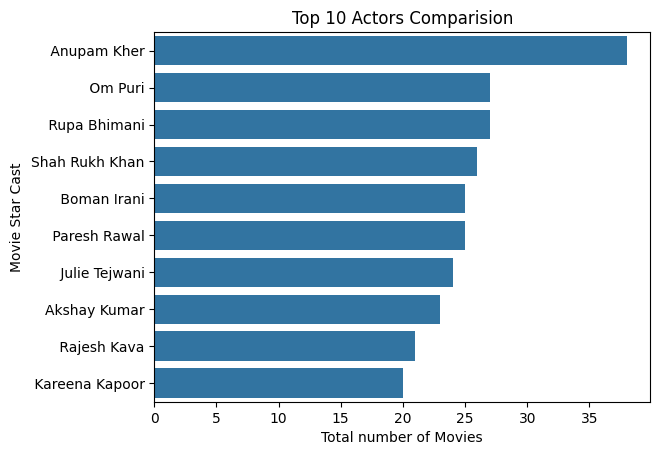

In [36]:
movie_cast_data = movie_data[['cast']].apply(lambda x: x.str.split(',')).explode('cast').reset_index(drop=True)
movie_cast_data=movie_cast_data[~movie_cast_data['cast'].str.contains('Unknown Cast')]
top10_movie_cast=movie_cast_data.value_counts().head(10).reset_index()
top10_movie_cast.columns = ['cast', 'count']  # Rename columns for clarity
print(top10_movie_cast)
sns.barplot(data=top10_movie_cast,x='count',y='cast')
plt.xlabel("Total number of Movies")
plt.ylabel("Movie Star Cast")
plt.title("Top 10 Actors Comparision")


**Insight - There are top 10 Actors who worked in most of the movies**

**Top 10 TV Show Cast**

                 cast  count
0    Takahiro Sakurai     24
1           Yuki Kaji     17
2           Ai Kayano     17
3      Junichi Suwabe     17
4         Daisuke Ono     14
5  David Attenborough     14
6     Takehito Koyasu     13
7     Yuichi Nakamura     13
8    Yoshimasa Hosoya     13
9       Kana Hanazawa     12


Text(0.5, 1.0, 'Top 10 Actors Comparision')

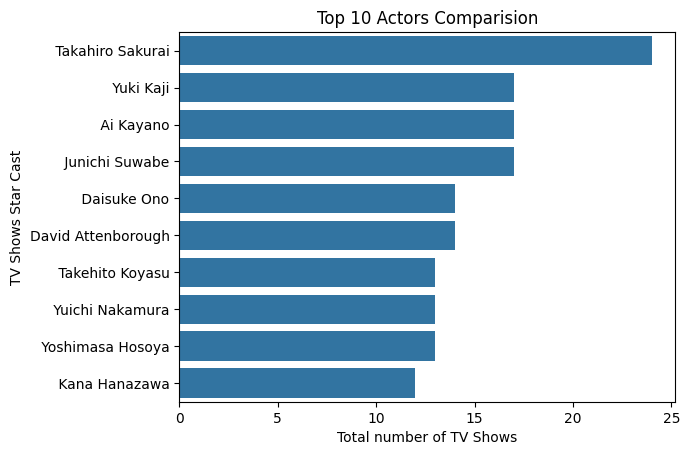

In [37]:
#top 10 TV Show Cast
tv_cast_data = tv_data[['cast']].apply(lambda x: x.str.split(',')).explode('cast').reset_index(drop=True)
tv_cast_data=tv_cast_data[~tv_cast_data['cast'].str.contains('Unknown Cast')]

top10_tv_cast=tv_cast_data.value_counts().head(10).reset_index()
top10_tv_cast.columns = ['cast', 'count']  # Rename columns for clarity
print(top10_tv_cast)
sns.barplot(data=top10_tv_cast,x='count',y='cast')
plt.xlabel("Total number of TV Shows")
plt.ylabel("TV Shows Star Cast")
plt.title("Top 10 Actors Comparision")





**Insight - There are top 10 Actors who worked in most of the TV Shows**

**Top 10 Genre in Movies**

                  listed_in  count
0      International Movies   2624
1                    Dramas   1600
2                  Comedies   1210
3        Action & Adventure    859
4             Documentaries    829
5                    Dramas    827
6        Independent Movies    736
7           Romantic Movies    613
8  Children & Family Movies    605
9                 Thrillers    512


Text(0.5, 1.0, 'Top 10 Genre Comparision')

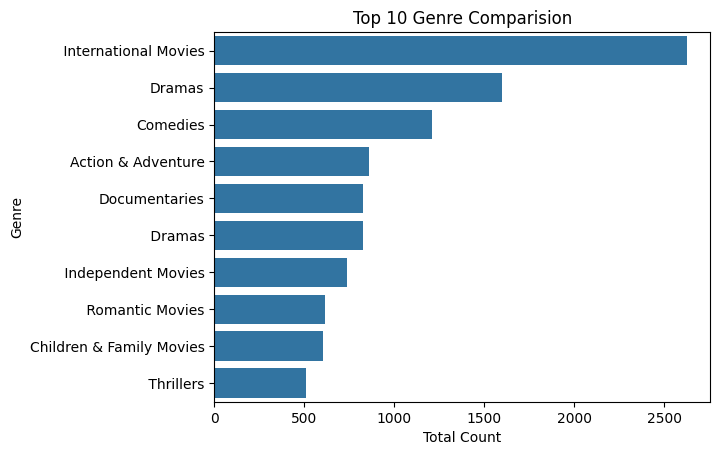

In [38]:
#top 10 Genre of Movie Cast
movie_genre_data = movie_data[['listed_in']].apply(lambda x: x.str.split(',')).explode('listed_in').reset_index(drop=True)
top10_movie_genre=movie_genre_data.value_counts().head(10).reset_index()
top10_movie_genre.columns = ['listed_in', 'count']  # Rename columns for clarity
print(top10_movie_genre)
sns.barplot(data=top10_movie_genre,x='count',y='listed_in')
plt.xlabel("Total Count")
plt.ylabel("Genre")
plt.title("Top 10 Genre Comparision")



**Insight - There are top 10 Genre of the Movies**

**Top 10 TV Shows Genre**

                 listed_in  count
0   International TV Shows    773
1                TV Dramas    695
2   International TV Shows    577
3              TV Comedies    455
4           Crime TV Shows    399
5                 Kids' TV    386
6        Romantic TV Shows    338
7         British TV Shows    252
8               Docuseries    220
9             Anime Series    175


Text(0.5, 1.0, 'Genre Comparision in TV Shows')

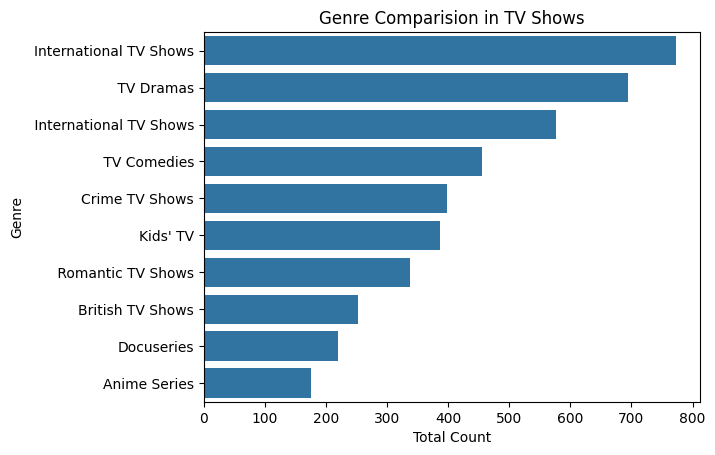

In [39]:
#top 10 Genre of TV Show Cast
tv_genre_data = tv_data[['listed_in']].apply(lambda x: x.str.split(',')).explode('listed_in').reset_index(drop=True)
top10_tv_genre=tv_genre_data.value_counts().head(10).reset_index()
top10_tv_genre.columns = ['listed_in', 'count']  # Rename columns for clarity
print(top10_tv_genre)
sns.barplot(data=top10_tv_genre,x='count',y='listed_in')
plt.xlabel("Total Count")
plt.ylabel("Genre")
plt.title("Genre Comparision in TV Shows")


**Insight - There are top 10 Genres of the TV Shows**

**Top 10 Directors of the Movies**

                 director  count
0           Rajiv Chilaka     19
1  Raúl Campos, Jan Suter     18
2             Suhas Kadav     16
3            Marcus Raboy     15
4               Jay Karas     14
5     Cathy Garcia-Molina     13
6         Martin Scorsese     12
7             Jay Chapman     12
8         Youssef Chahine     12
9        Steven Spielberg     11


Text(0.5, 1.0, 'Top 10 Directors')

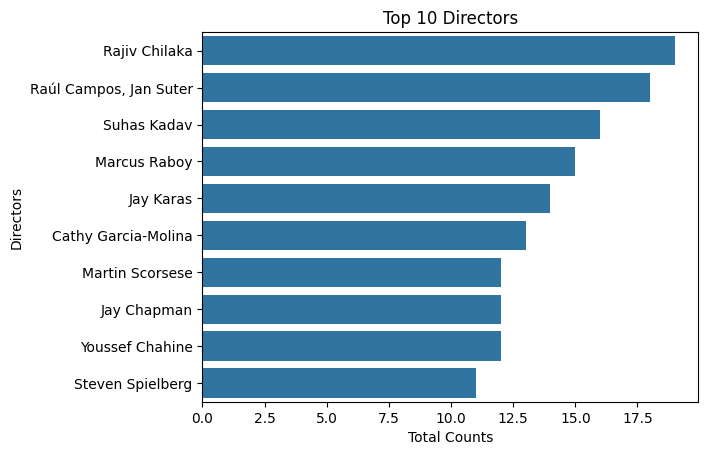

In [40]:
#movie_data['director'].value_counts().head()
#movie_cast_data=movie_cast_data[~movie_cast_data['cast'].str.contains('Unknown Cast')]
movie_director_data=movie_data[~movie_data['director'].str.contains('Unknown Director')]

top10_movie_director=movie_director_data['director'].value_counts().head(10).reset_index()
top10_movie_director.columns = ['director', 'count']  # Rename columns for clarity
print(top10_movie_director)
sns.barplot(data=top10_movie_director,x='count',y='director')
plt.xlabel("Total Counts")
plt.ylabel("Directors")
plt.title("Top 10 Directors")

**Insight - There are top 10 Directors who directed most of the Movies**

**Top 10 Directors of the TV Shows**

                              director  count
0                  Alastair Fothergill      3
1                      Rob Seidenglanz      2
2                            Ken Burns      2
3                          Stan Lathan      2
4                          Shin Won-ho      2
5                          Hsu Fu-chun      2
6                       Iginio Straffi      2
7                          Jason Hehir      1
8                      Gerhard Mostert      1
9  Luis Alfaro, Javier Gómez Santander      1


Text(0.5, 1.0, 'Top 10 Directors')

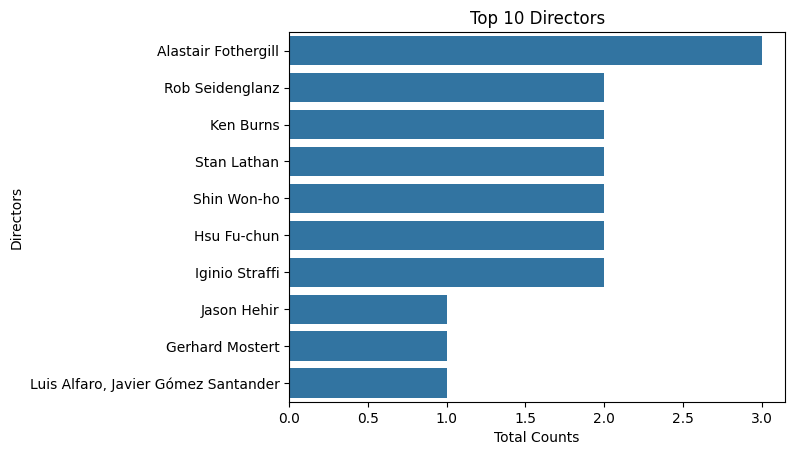

In [41]:
tv_director_data=tv_data[~tv_data['director'].str.contains('Unknown Director')]

top10_tv_director=tv_director_data['director'].value_counts().head(10).reset_index()
top10_tv_director.columns = ['director', 'count']  # Rename columns for clarity
print(top10_tv_director)
sns.barplot(data=top10_tv_director,x='count',y='director')
plt.xlabel("Total Counts")
plt.ylabel("Directors")
plt.title("Top 10 Directors")

**Insight - There are top 10 Directors who directed most of the TV Shows**

**Top 10 Countries where most Movies are released**

          country  count
0   United States   2498
1           India    893
2  United Kingdom    206
3          Canada    122
4           Spain     97
5           Egypt     92
6         Nigeria     86
7       Indonesia     77
8           Japan     76
9          Turkey     76


Text(0.5, 1.0, 'Top 10 Movies Countries')

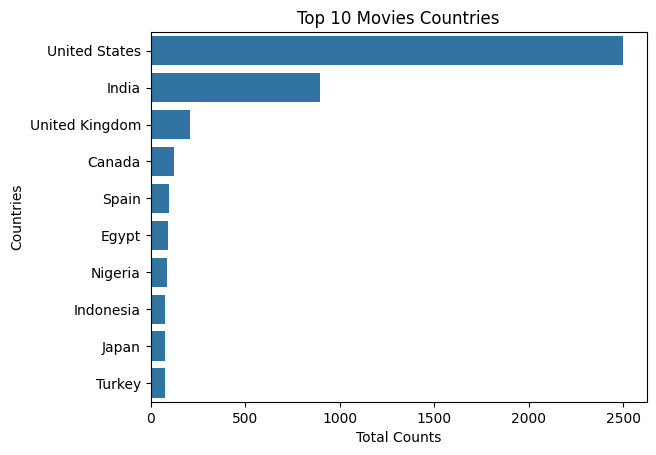

In [115]:
top10_movie_country=movie_data['country'].value_counts().head(10).reset_index()
top10_movie_country.columns = ['country', 'count']  # Rename columns for clarity
print(top10_movie_country)
sns.barplot(data=top10_movie_country,x='count',y='country')
plt.xlabel("Total Counts")
plt.ylabel("Countries")
plt.title("Top 10 Movies Countries")

**Insight - There are top 10 Countries where most of the Movies are released**

**Top 10 Countries where most TV Shows are released**

          country  count
0   United States   1144
1  United Kingdom    212
2           Japan    168
3     South Korea    158
4           India     79
5          Taiwan     68
6          Canada     59
7          France     49
8           Spain     48
9       Australia     47


Text(0.5, 1.0, 'Top 10 TV Shows Countries')

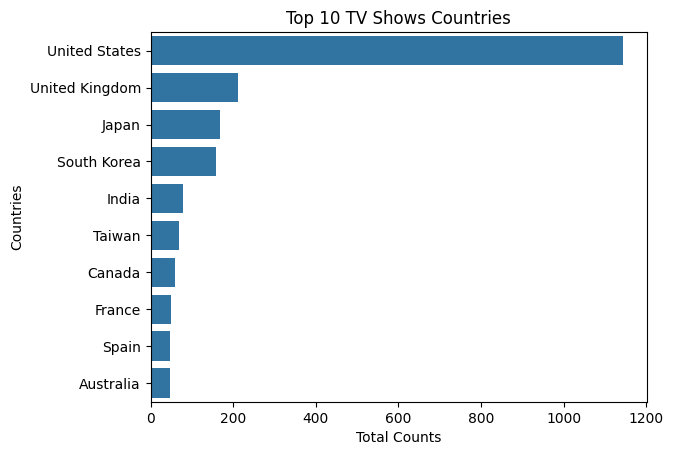

In [66]:
top10_tv_country=tv_data['country'].value_counts().head(10).reset_index()
top10_tv_country.columns = ['country', 'count']  # Rename columns for clarity
print(top10_tv_country)
sns.barplot(data=top10_tv_country,x='count',y='country')
plt.xlabel("Total Counts")
plt.ylabel("Countries")
plt.title("Top 10 TV Shows Countries")

**Insight - There are top 10 Countries where most of the Movies are released**

**Top 10 Years where most of the movies are released**

In [45]:
release_data=movie_data['release_year'].value_counts().head(10).reset_index()
release_data.columns=['release_year','counts']

Text(0.5, 1.0, 'Movie_Data for Every Year')

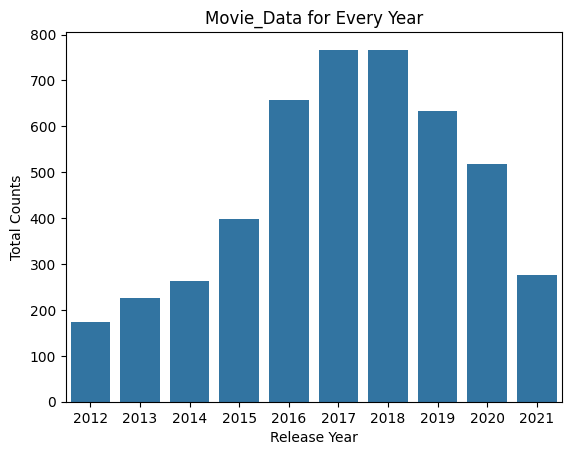

In [46]:
sns.barplot(data=release_data,x='release_year',y='counts')
plt.xlabel("Release Year")
plt.ylabel("Total Counts")
plt.title("Movie_Data for Every Year")

**Number of Movies got increased till 2018 but there is a dip after 2018**

**Top 10 Years where most of the TV Shows are released**

In [47]:
release_tvdata=tv_data['release_year'].value_counts().head(10).reset_index()
release_tvdata.columns=['release_year','counts']

Text(0.5, 1.0, 'TV_Data for Every Year')

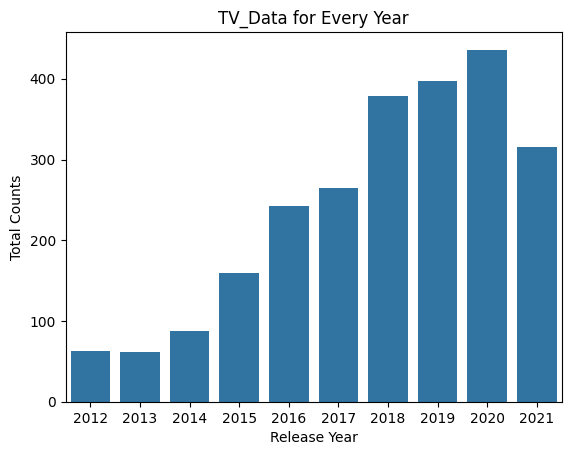

In [48]:
sns.barplot(data=release_tvdata,x='release_year',y='counts')
plt.xlabel("Release Year")
plt.ylabel("Total Counts")
plt.title("TV_Data for Every Year")

**Number of Movies got increased till 2020 but there is a dip in 2021**

**Top 5 Ratings**

In [137]:
data1=data[['release_year','type']]
data2=data1.groupby(['release_year','type']).size().reset_index(name='Counts').sort_values(by='Counts',ascending=False).head(10)
print(data2)

     release_year     type  Counts
109          2017    Movie     767
111          2018    Movie     767
107          2016    Movie     658
113          2019    Movie     633
115          2020    Movie     517
116          2020  TV Show     436
105          2015    Movie     398
114          2019  TV Show     397
112          2018  TV Show     380
118          2021  TV Show     315


<Axes: xlabel='release_year', ylabel='Counts'>

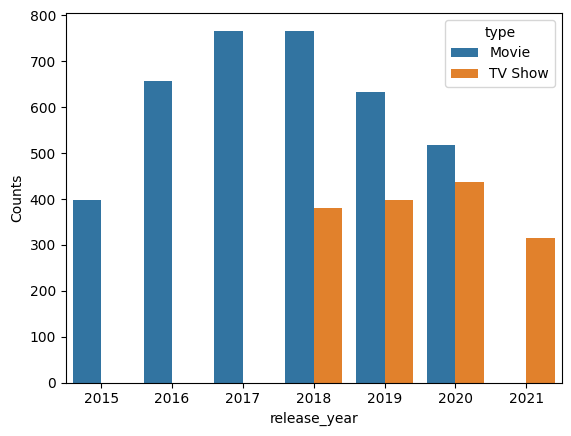

In [138]:
plt.xlim(left=2000,right=2021)
sns.barplot(data=data2,x='release_year',y='Counts',hue='type')


<Axes: xlabel='rating', ylabel='Counts'>

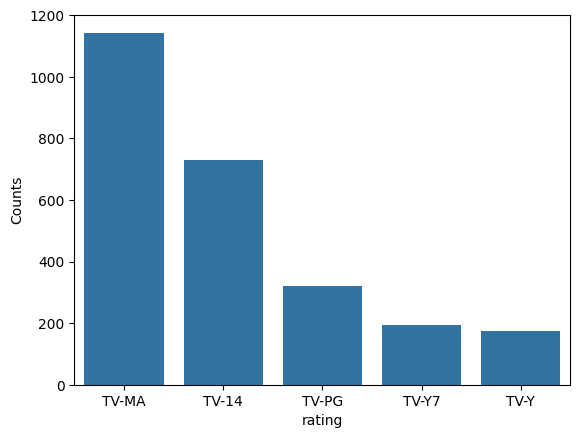

In [139]:
ratings=tv_data.groupby('rating').size().reset_index(name='Counts')
ratings=ratings.sort_values(by=['Counts'],ascending=False)
ratings=ratings.head()
sns.barplot(data=ratings,x='rating',y='Counts')


**Insight - Top 5 rating in TV Shows**

**Question - What is the best time to launch a TV show?**


Text(0, 0.5, 'Number of TV Shows')

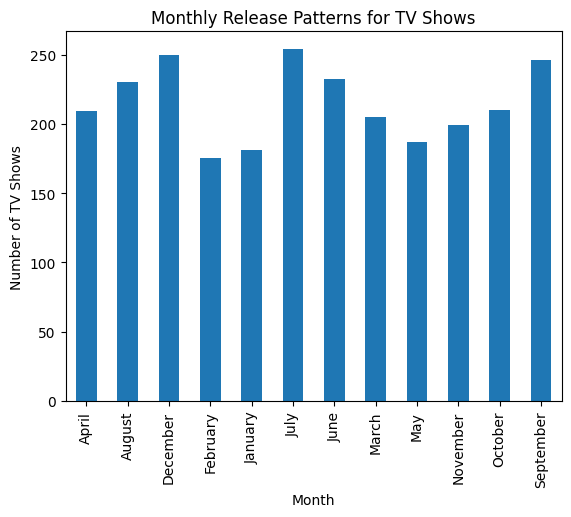

In [143]:
tv_data['date_added']= pd.to_datetime(tv_data['date_added'],errors='coerce')
tv_data['month'] = tv_data['date_added'].dt.month_name()
tv_data['week'] = tv_data['date_added'].dt.day_name()
tv_data['quarter'] = tv_data['date_added'].dt.quarter


# Monthly release patterns
monthly_adds = tv_data['month'].value_counts().sort_index()
monthly_adds.plot(kind='bar')
plt.title('Monthly Release Patterns for TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')


**Insight- July is the best month to release a TV Show**

Text(0, 0.5, 'Number of Movies')

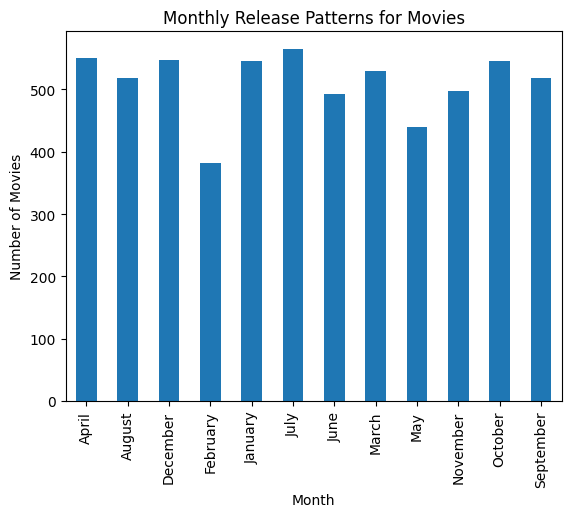

In [144]:
movie_data['date_added']= pd.to_datetime(movie_data['date_added'],errors='coerce')
movie_data['month'] = movie_data['date_added'].dt.month_name()
movie_data['week'] = movie_data['date_added'].dt.day_name()
movie_data['quarter'] = movie_data['date_added'].dt.quarter


# Monthly release patterns
monthly_adds = movie_data['month'].value_counts().sort_index()
monthly_adds.plot(kind='bar')
plt.title('Monthly Release Patterns for Movies')
plt.xlabel('Month')
plt.ylabel('Number of Movies')


**Insight - July is the best month to relase a Movie too**

Text(0, 0.5, 'Number of TV Shows')

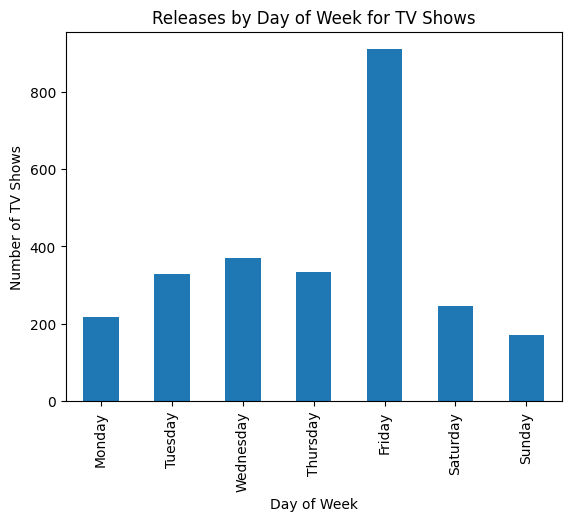

In [146]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday', 'Sunday']
day_counts = tv_data['week'].value_counts()
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar')
plt.title('Releases by Day of Week for TV Shows')
plt.xlabel('Day of Week')
plt.ylabel('Number of TV Shows')

**Insight - Friday is the best time to relase a TV Show**

**Recommandation - We need to try to release TV_Shows on Friday because there would be weekend after Friday**

Text(0, 0.5, 'Number of Movies')

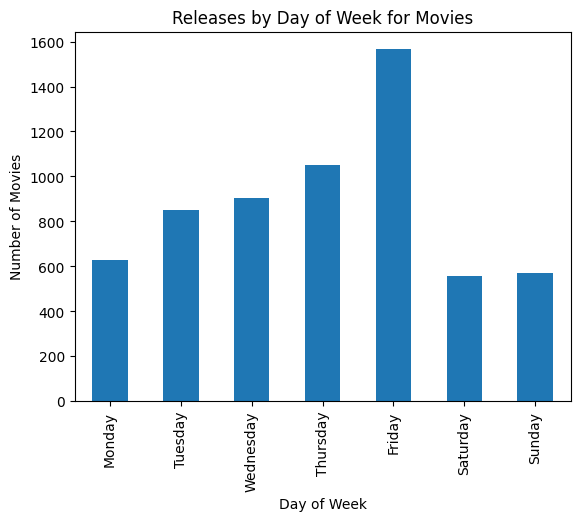

In [147]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday', 'Sunday']
day_counts = movie_data['week'].value_counts()
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar')
plt.title('Releases by Day of Week for Movies')
plt.xlabel('Day of Week')
plt.ylabel('Number of Movies')

**Insight - Friday is the best time to relase a Movie too**

**Recommandation - We need to try to release TV_Shows on Friday because there would be weekend after Friday**

**TV Shows Rating Chart per Month**

In [52]:
tv_data['month'] = tv_data['date_added'].dt.month_name()  # Extract the month
#tv_data['month']= tv_data[' date_added '][0].month_name
data3=tv_data[['month','rating']]
data4=data3.groupby(['rating','month']).size().reset_index(name='Counts')
print(data4.sort_values(by=['Counts'],ascending=False).head(20))


   rating      month  Counts
34  TV-MA       June     124
39  TV-MA  September     114
29  TV-MA     August     105
33  TV-MA       July     103
28  TV-MA      April     102
35  TV-MA      March      92
30  TV-MA   December      91
37  TV-MA   November      86
38  TV-MA    October      80
6   TV-14   December      77
31  TV-MA   February      77
36  TV-MA        May      76
9   TV-14       July      72
32  TV-MA    January      71
14  TV-14    October      61
5   TV-14     August      59
13  TV-14   November      58
10  TV-14       June      58
7   TV-14   February      57
15  TV-14  September      57


C:\Users\User\AppData\Local\Temp\ipykernel_11280\3971400851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['month'] = tv_data['date_added'].dt.month_name()  # Extract the month


Text(0.5, 1.0, 'Rating Comparision per Month')

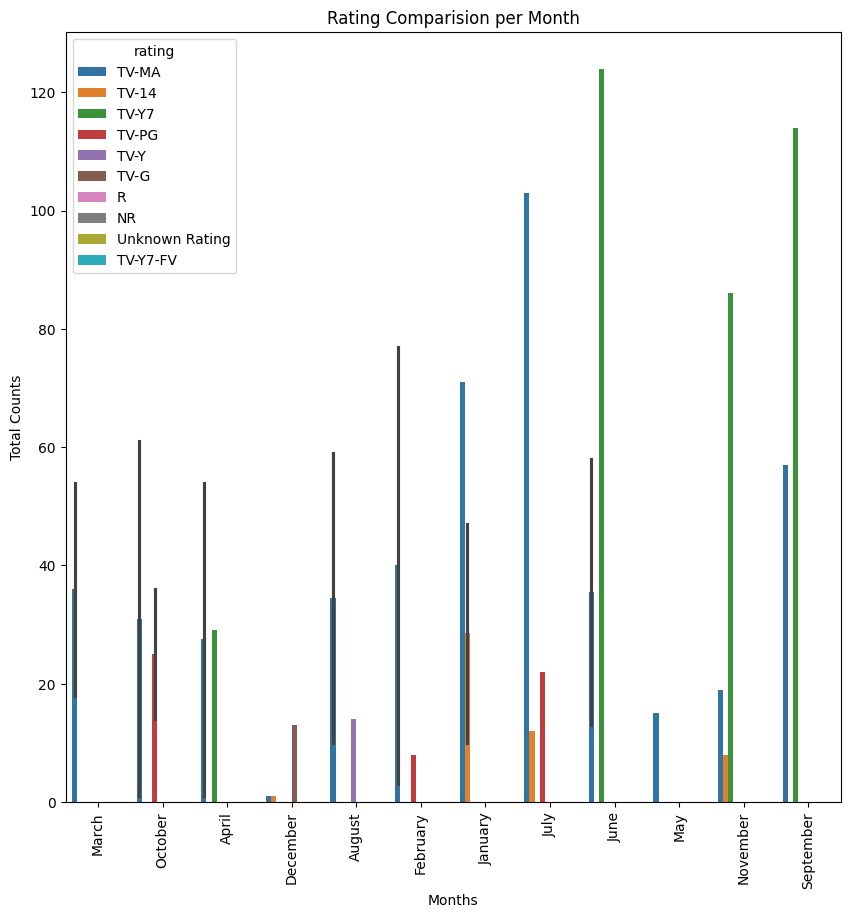

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(data=data4,x='month',y='Counts',hue=data3.rating)
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Total Counts")
plt.title("Rating Comparision per Month")

**so June is the best month to release a TV Show**

In [60]:
movie_data['date_added']= pd.to_datetime(movie_data['date_added'],errors='coerce')
movie_data['month'] = movie_data['date_added'].dt.month_name()  # Extract the month
#tv_data['month']= tv_data[' date_added '][0].month_name
data5=movie_data[['month','rating']]
data6=data5.groupby(['rating','month']).size().reset_index(name='Counts')
print(data6.sort_values(by=['Counts'],ascending=False).head(20))


    rating      month  Counts
89   TV-MA      April     198
96   TV-MA      March     198
95   TV-MA       June     189
91   TV-MA   December     189
90   TV-MA     August     180
99   TV-MA    October     177
94   TV-MA       July     175
97   TV-MA        May     166
100  TV-MA  September     166
65   TV-14      April     149
93   TV-MA    January     149
92   TV-MA   February     144
75   TV-14    October     141
67   TV-14   December     141
66   TV-14     August     140
98   TV-MA   November     131
71   TV-14       June     118
70   TV-14       July     118
76   TV-14  September     117
72   TV-14      March     117


C:\Users\User\AppData\Local\Temp\ipykernel_11280\663877526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['date_added']= pd.to_datetime(movie_data['date_added'],errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_11280\663877526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['month'] = movie_data['date_added'].dt.month_name()  # Extract the month


Text(0.5, 1.0, 'Rating Comparision per Month')

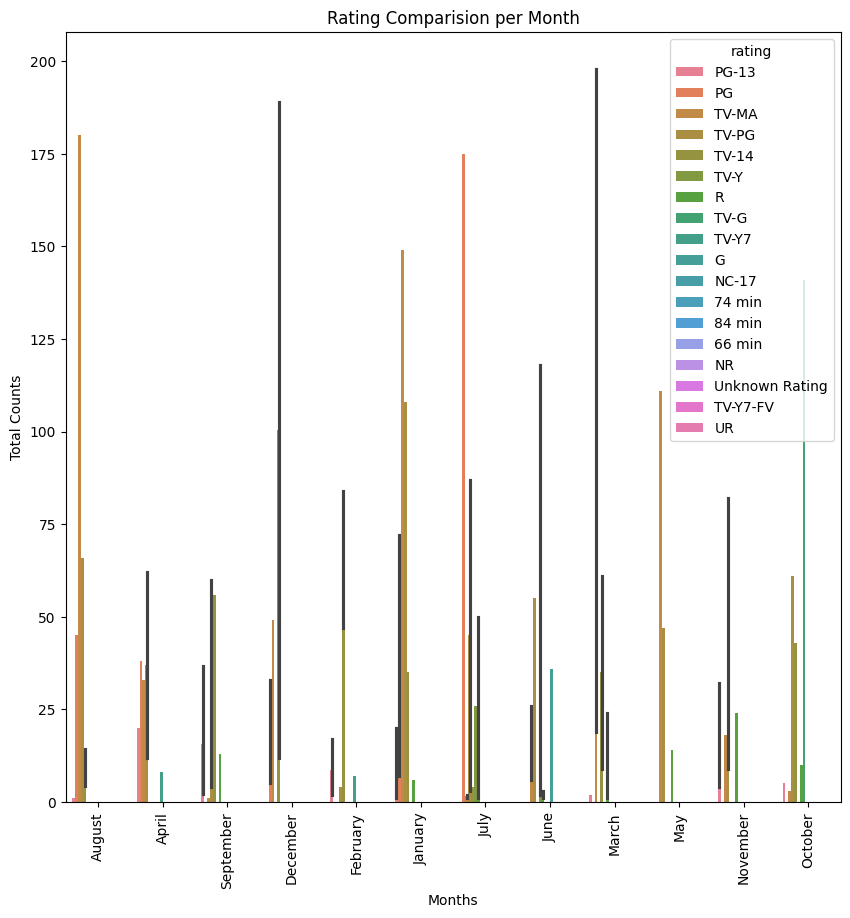

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(data=data6,x='month',y='Counts',hue=data5.rating)
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Total Counts")
plt.title("Rating Comparision per Month")

**Average Number of Seasons**

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_11280\2995720581.py:1: SyntaxWarning: invalid escape sequence '\d'
  tv_data['Duration_Seasons'] = tv_data['duration'].str.extract('(\d+)').astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_11280\2995720581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['Duration_Seasons'] = tv_data['duration'].str.extract('(\d+)').astype(int)


Text(0.5, 1.0, 'Average Seasons')

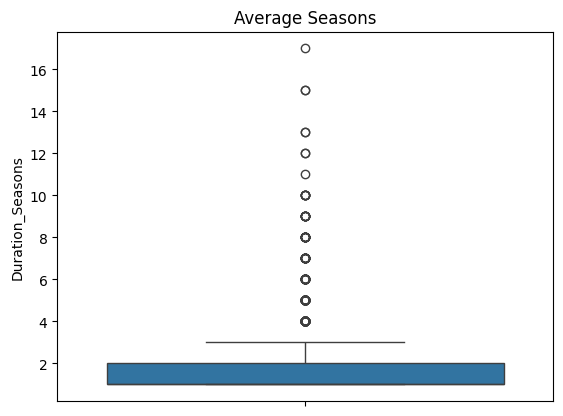

In [62]:
tv_data['Duration_Seasons'] = tv_data['duration'].str.extract('(\d+)').astype(int)
sns.boxplot(y=tv_data['Duration_Seasons'])
plt.title("Average Seasons")


**Insight - Here Most of the TV Shows has 2 seasons**

**Average time in Minutes for Movies**

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_11280\1085973767.py:1: SyntaxWarning: invalid escape sequence '\d'
  movie_data['Duration_Minutes'] = movie_data['duration'].str.extract('(\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_11280\1085973767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Duration_Minutes'] = movie_data['duration'].str.extract('(\d+)').astype(float)


Text(0.5, 1.0, 'Average time in Minutes')

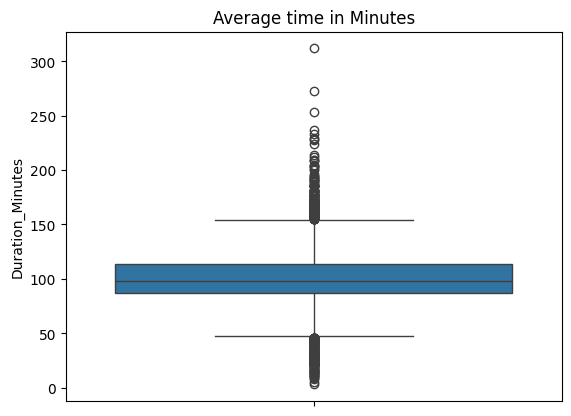

In [63]:
movie_data['Duration_Minutes'] = movie_data['duration'].str.extract('(\d+)').astype(float)
sns.boxplot(movie_data['Duration_Minutes'])
plt.title("Average time in Minutes")

**Insight - Here Most of the Movies have 100+ minutes as Duration**